# Value at Risk Assessment Model

### Import Packages

In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

### Distributions - Set Up Stock Parameters

In [2]:
# Number of shares
shares_MSFT = 1000

# Live stock price
price = yf.Ticker('MSFT')
price_MSFT = price.history().tail(1)['Close'].iloc[0]

print(price)
print('---------')
print(price_MSFT)

yfinance.Ticker object <MSFT>
---------
235.11000061035156


30-day Historical volatility source: https://www.alphaquery.com/stock/MSFT/volatility-option-statistics/30-day/historical-volatility

In [3]:
# Investment value
value_MSFT = price_MSFT * shares_MSFT

# Risk free rate (4 week treasury bill rate)
rfr_MSFT = 0.02 

# Volatility (30-day volatility at that time)
vol_MSFT = 0.2116

### Simulations - Calculate Investment Returns

In [4]:
# Number of simulations
simulations = 5000 

# Investment time in a year
t_MSFT = 21/252 

(array([  1.,   0.,   1.,   0.,   1.,   1.,   3.,   2.,   1.,   2.,   3.,
          0.,   5.,   4.,   5.,   3.,   8.,   3.,  10.,  11.,  12.,  18.,
         16.,  20.,  24.,  22.,  26.,  47.,  38.,  48.,  61.,  59.,  56.,
         78.,  60.,  86.,  91.,  89., 101., 109., 115., 119., 108., 121.,
        142., 146., 145., 116., 143., 132., 144., 132., 157., 148., 133.,
        148., 144., 112., 121., 110., 127., 116., 112.,  85.,  97.,  67.,
         69.,  62.,  63.,  48.,  44.,  50.,  54.,  28.,  31.,  21.,  24.,
         19.,  15.,  18.,  15.,   8.,   9.,   6.,   7.,  18.,   7.,   4.,
          2.,   0.,   1.,   2.,   0.,   0.,   3.,   2.,   2.,   0.,   2.,
          1.]),
 array([-3.68605388, -3.61351803, -3.54098218, -3.46844632, -3.39591047,
        -3.32337462, -3.25083877, -3.17830292, -3.10576707, -3.03323122,
        -2.96069537, -2.88815952, -2.81562367, -2.74308782, -2.67055197,
        -2.59801612, -2.52548027, -2.45294442, -2.38040857, -2.30787272,
        -2.23533686, -2.16

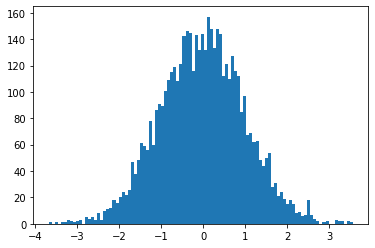

In [5]:
# Explain np.random.standard_normal
sample = np.random.standard_normal(5000)
plt.hist(sample,bins=100)

In [6]:
print(np.mean(sample))
print(np.std(sample))

-0.022073810341534477
1.0021428262538952


In [7]:
# Create a function to calculate the returns of the investment
def VaR(pv, rfr, vol, t, simulations):
    end_value = pv * np.exp((rfr - .5 * vol ** 2) * t + np.random.standard_normal(
        simulations) * vol * np.sqrt(t))
    returns = end_value - pv
    return returns

# Apply the VaR function to simulate the returns
returns_MSFT = VaR(value_MSFT, rfr_MSFT, vol_MSFT, t_MSFT, simulations)

### Quantifications - Identify VaR at 90%, 95%, and 99% Confidence Level

In [8]:
# Explain string formatting
# Print: VaR at x% confidence level: $y.

x = 0.9
y = 3455.248
print("VaR at {:.0%} confidence level: ${:,.0f}".format(x, y))

VaR at 90% confidence level: $3,455


VaR at 90% confidence level: $-17,190
VaR at 95% confidence level: $-22,375
VaR at 99% confidence level: $-32,470


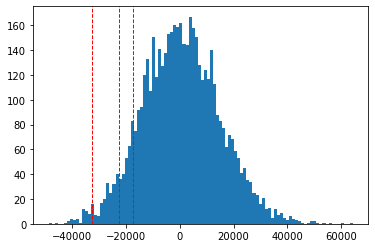

In [9]:
# Plot the returns
plt.hist(returns_MSFT, bins=100);

# Show VaR at 90%, 95%, and 99% confidence level
percentiles = [10,5,1]

for i in percentiles:
    confidence = (100-i)/100
    value = np.percentile(returns_MSFT, i)
    print("VaR at {:.0%} confidence level: ${:,.0f}".format(confidence, value))
    plt.axvline(value, color = 'red', linestyle='dashed', linewidth=1)